<a href="https://colab.research.google.com/github/ssosoo/2024_DS60/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")

In [29]:
from sklearn.model_selection import train_test_split
#20%만 테스트 데이터로 분류
train, test = train_test_split(df, test_size=0.2)

train.shape[0]
test.shape[0]

20

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC  #분류회귀 알고리즘
import numpy as np


#최적의 SVC파라미터 찾음
def svc_param_selection(X, y, nfolds):
  svm_parameters = [
      {'kernel': ['rbf'], #데이터 변환 방식
       'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], #복잡도 조절
       'C': [0.01, 0.1, 1, 10, 100, 1000] #오류 허용 정도 조절
       }]

  #사이킷런에서 제공하는 GridSearchCV를 사용해 최적의 파라미터를 구함
  clf = GridSearchCV(SVC(), svm_parameters, cv=10)
  clf.fit(X_train, y_train.values.ravel())
  print(clf.best_params_)

  return clf

#3점슛과 블로킹 횟수를 학습 데이터로 사용
X_train = train[['3P', 'BLK']]

#농구선수 포지션을 예측값으로 선정
y_train = train[['Pos']]

#최적의 파라미터 학습모델을 clf로 저장
clf = svc_param_selection(X_train, y_train.values.ravel(), 10)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [47]:
clf.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

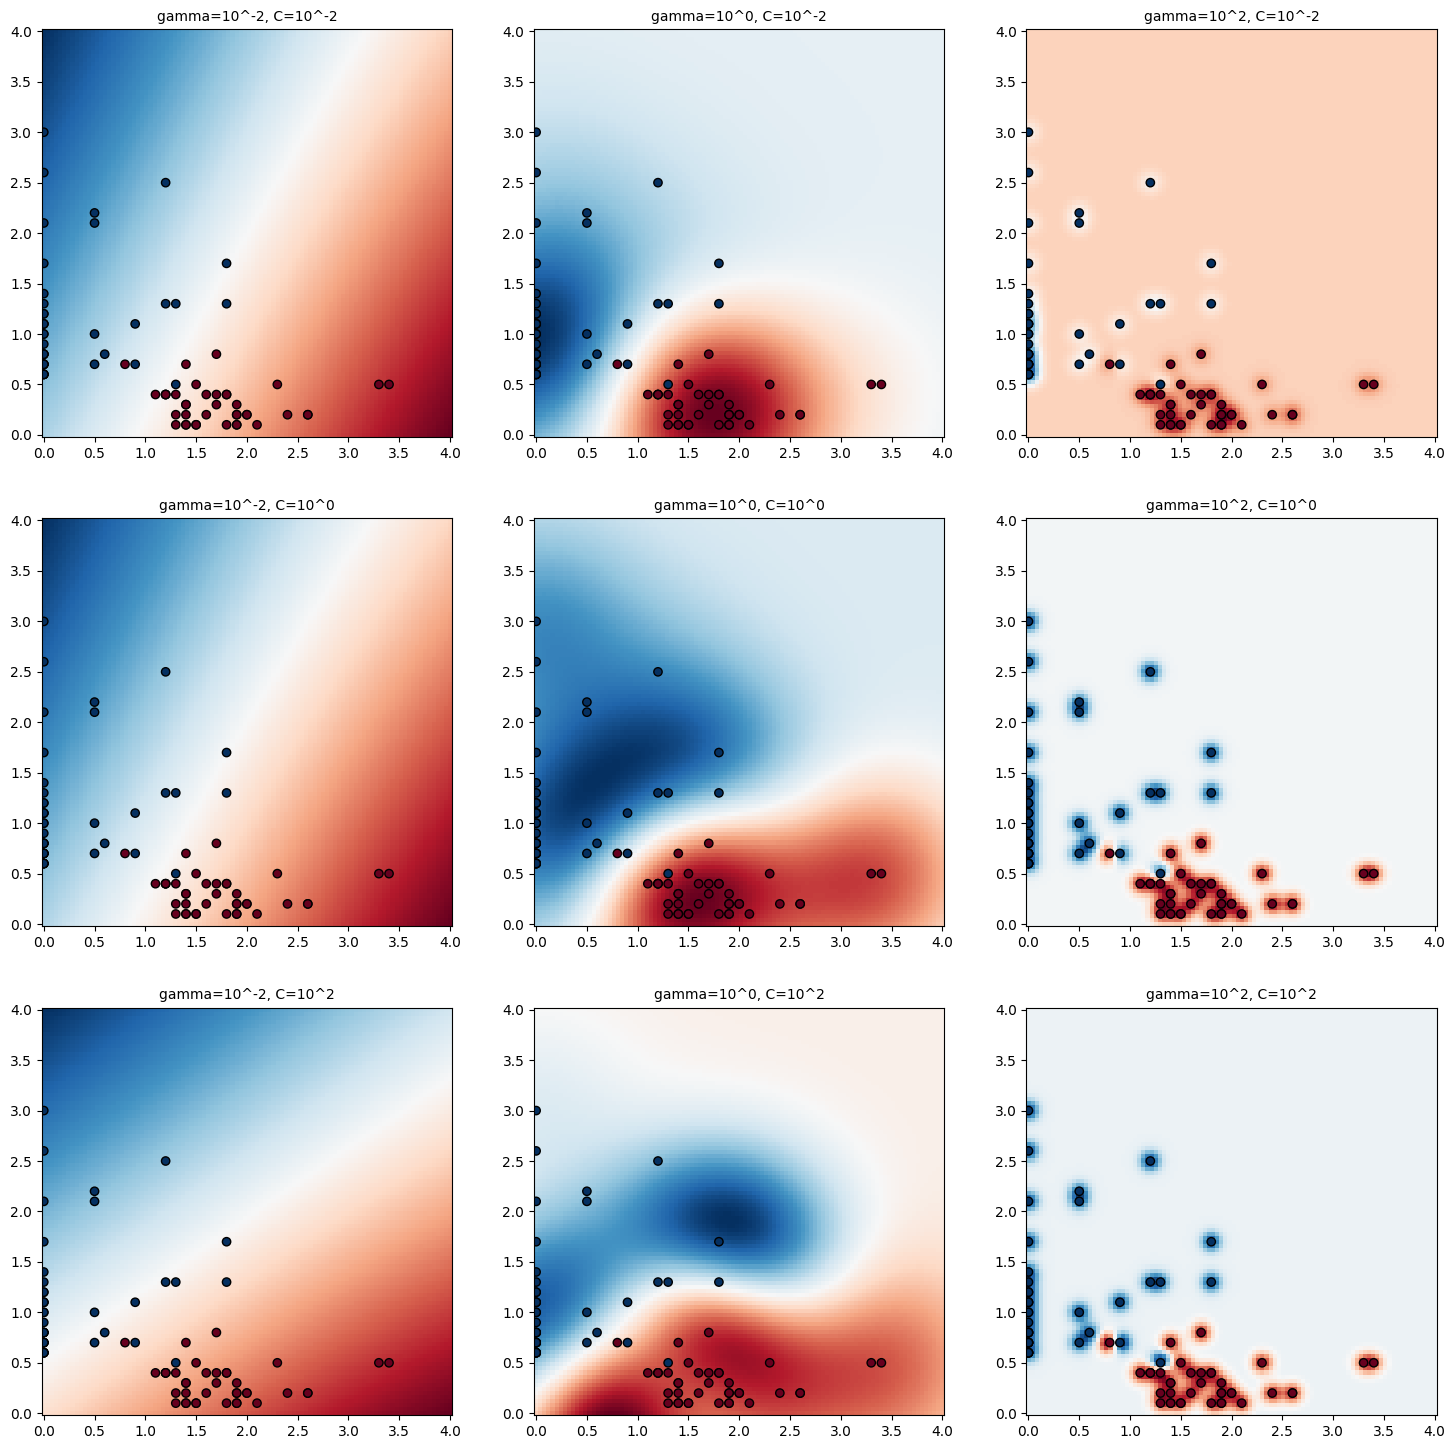

In [48]:
#모델 시각화

C_canditates = []
C_canditates.append(clf.best_params_['C']*0.01)
C_canditates.append(clf.best_params_['C'])
C_canditates.append(clf.best_params_['C']*100)

#시각화할 감마 후보들을 저장
gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma']*0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma']*100) #gamma, C모두 키값으로 미리 지정됨

#knn이랑 연결해서 코드??
#3점슛과 블로킹 횟수로 학습
X = train[['3P', 'BLK']]
#농구선수 포지션을 학습 모델의 분류값으로 사용
Y = train['Pos'].tolist()

#시각화를 위해 Center와 SG를 숫자로 표현
position = []
for gt in Y:
  #포지션이 센터일경우
  if gt == 'C':
    position.append(0)
  else:
    position.append(1)

classifiers = []

# 파라미터 후보들을 조합해서 각각 감마, c별 학습된 모델들 저장
for C in C_canditates:
  for gamma in gamma_candidates:
    clf = SVC(C=C, gamma=gamma)
    clf.fit(X,Y)
    classifiers.append((C, gamma, clf)) #학습된 모델을 튜플 형태로 리스트 저장

#모델 시각화
plt.figure(figsize=(18,18))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

for(k, (C, gamma, clf)) in enumerate(classifiers):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.subplot(len(C_canditates), len(gamma_candidates), k+1)
  plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
            size='medium')

  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
  plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu_r,
              edgecolors='k')


In [49]:
X_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

#최적의 파라미터 모델로 테스트 진행
y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))
print()
print("accuracy: " + str(accuracy_score(y_true, y_pred)))

              precision    recall  f1-score   support

           C       0.78      0.78      0.78         9
          SG       0.82      0.82      0.82        11

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20


accuracy: 0.8
